# nubank - Simple Monte Carlo Simulation 

<b>In this demo a simple Monte Carlo Simulation forecasting method is applied on the monthly gold price index since 1950. The goal is to show the simplicity of the usage of the python libraries. </b>

In [22]:
# _  __  ____ _____  __  _          
# |\ ||  ||__]|__||\ ||_/           
# | \||__||__]|  || \|| \_          
                                  
# _  ______  ________               
# |\/||  ||\ | | |___               
# |  ||__|| \| | |___               
                                  
# _____________   ____              
# |   |__||__/|   |  |              
# |___|  ||  \|___|__|              
                                  
# ______  __  __   _____________  _ 
# [__ ||\/||  ||   |__| | ||  ||\ | 
# ___]||  ||__||___|  | | ||__|| \| 
                                  
# __  _   ____   _____  ______  _   
# ||\ |   |__]\_/  | |__||  ||\ |   
# || \|   |    |   | |  ||__|| \|   
                                  
# Let´s type some code...

In [23]:
import numpy as np 
import pandas as pd 

# CSV-file is available in the folder "mydata/"
# Next line shows the folder content

import os
print(os.listdir("mydata"))

['.ipynb_checkpoints', 'monthly_gold_price_since_1950.csv']


# Import of data

In [24]:
mcsdaten =pd.read_csv("mydata/monthly_gold_price_since_1950.csv")

# Show first and last 7 rows

In [25]:
mcsdaten.head(7)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73


In [26]:
mcsdaten.tail(7)

,Date,Price
832,2019-05,1282.460
833,2019-06,1358.488
834,2019-07,1414.611
835,2019-08,1497.102
836,2019-09,1510.336
837,2019-10,1494.765
838,2019-11,1471.921


# Plot the time series

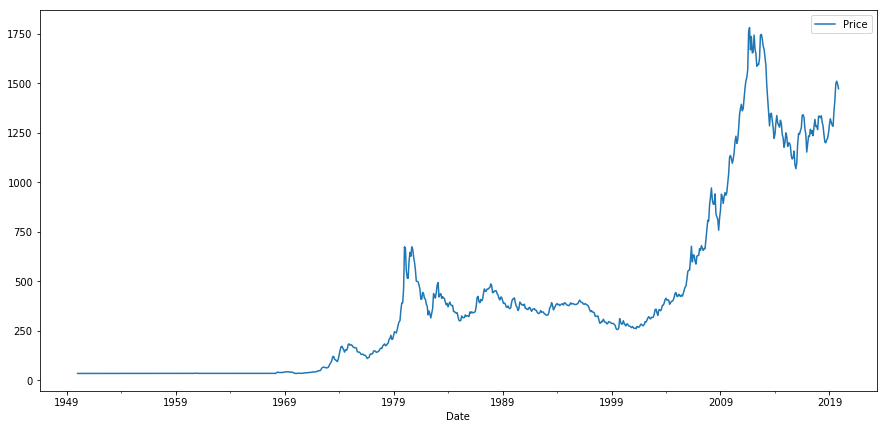

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#read the csv data
data = pd.read_csv('mydata/monthly_gold_price_since_1950.csv', usecols=['Date','Price'], parse_dates=['Date'])
#set the Date column as index
data.set_index('Date',inplace=True)

#plot the csv data
fig, ax = plt.subplots(figsize=(15,7))
data.plot(ax=ax)



# Mean, Variance Drift, Trend and Standard Deviation of the log-returns

In [28]:
from scipy.stats import norm
log_returns = np.log(1 + mcsdaten.Price.pct_change())
u = log_returns.mean() # mean of the log_returns
var = log_returns.var() # variance of the log_returns
drift = u - (0.5 * var) # drift and trend of the log_returns
stdev = log_returns.std() # standard deviation of the log-returns


t_intervals = 12 # forecast of 12 time points
iterations = 10 # 10 diverse forecasts (as loop)

monthly_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#monthly_returns as "noise", multiplicated by t time price, receiving t+1 time price

# Create empty matrix for the monthly returns

In [29]:
S0 = mcsdaten.Price.iloc[-1]
S0

1471.921

In [30]:
# empty matrix for monthly_returns
price_list = np.zeros_like(monthly_returns)
price_list[0] = S0
price_list

array([[1471.921, 1471.921, 1471.921, 1471.921, 1471.921, 1471.921,
        1471.921, 1471.921, 1471.921, 1471.921],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0. 

# Create MCS forecast for the next 12 months

In [31]:
# A simple Loop generates a forecast for the next 12 months
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * monthly_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000
1,1411.460196,1356.688545,1505.561252,1364.782464,1502.831368,1556.373080,1444.158197,1463.884110,1355.652982,1437.572016,1411.460196
2,1422.495080,1338.281129,1479.829608,1299.092443,1576.673581,1643.916017,1507.454629,1473.925697,1319.265702,1434.206411,1422.495080
3,1375.355436,1424.061831,1450.413447,1268.847119,1605.330299,1541.410745,1422.677571,1545.580622,1340.966139,1534.460280,1375.355436
4,1341.458448,1451.052400,1464.260863,1196.527922,1463.060408,1586.040123,1453.924213,1619.686277,1377.892042,1599.016825,1341.458448


In [32]:
close = mcsdaten.Price
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

C:\Users\ayhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




# Create 10 Monte Carlo Simulation Forecasts

In [33]:
monte_carlo_forecast.head(10)

,Price,0,1,2,3,4,5,6,7,8,9,close
0,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create forecasts for the last 12 time points

In [34]:
monte_carlo_forecast.tail(12)

,Price,0,1,2,3,4,5,6,7,8,9,close
0,NaN,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000,1471.921000
1,NaN,1411.460196,1356.688545,1505.561252,1364.782464,1502.831368,1556.373080,1444.158197,1463.884110,1355.652982,1437.572016,1411.460196
2,NaN,1422.495080,1338.281129,1479.829608,1299.092443,1576.673581,1643.916017,1507.454629,1473.925697,1319.265702,1434.206411,1422.495080
3,NaN,1375.355436,1424.061831,1450.413447,1268.847119,1605.330299,1541.410745,1422.677571,1545.580622,1340.966139,1534.460280,1375.355436
4,NaN,1341.458448,1451.052400,1464.260863,1196.527922,1463.060408,1586.040123,1453.924213,1619.686277,1377.892042,1599.016825,1341.458448
5,NaN,1454.265901,1570.244788,1399.900420,1162.374552,1358.198505,1529.622918,1442.126626,1759.226784,1386.357022,1755.363412,1454.265901
6,NaN,1415.467317,1601.750962,1457.798313,1182.905805,1350.007955,1501.955748,1489.791371,1722.288239,1419.408882,1798.057609,1415.467317
7,NaN,1415.949913,1469.876045,1511.374059,1195.014058,1390.370916,1459.536137,1440.840783,1661.981845,1460.058288,1862.477230,1415.949913
8,NaN,1371.068126,1545.916405,1453.645914,1261.725270,1393.996110,1357.559821,1352.139787,1741.135593,1366.116827,1867.318514,1371.068126
9,NaN,1345.386446,1521.578676,1497.953015,1239.826362,1365.428323,1353.064622,1430.481691,1722.133548,1382.775720,1850.758084,1345.386446


# Plot the Monte Carlo Simulation Forecasts

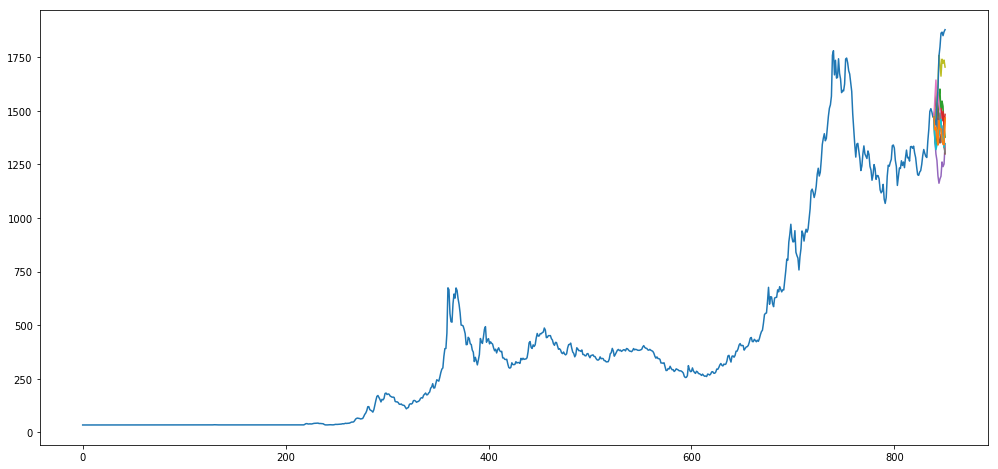

In [35]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt

plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()

# Distribution of the Logarithmical Returns

In [36]:
# Distribution of the log-Returns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
trace = go.Histogram(x=log_returns,opacity=0.85,name = "Logarithmic Return", marker=dict(color='rgba(0, 0, 255, 0.8)'))
info = [trace]
layout = go.Layout(barmode='overlay',
                   title='Distribution of the Logarithmic Returns',
                   xaxis=dict(title='Logarithmic Return'),
                   yaxis=dict( title='Distribution'),
)
fig = go.Figure(data=info, layout=layout)
iplot(fig)

# Analysis of the Seasonality

In [37]:
mcsdaten = mcsdaten.dropna()

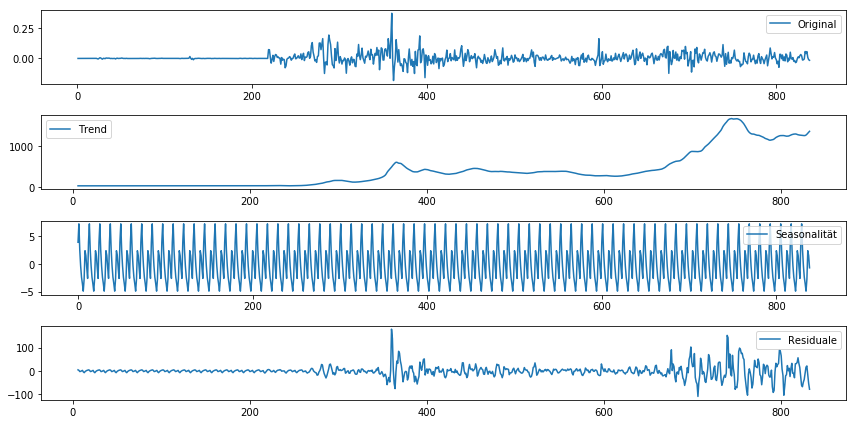

In [38]:
# Analysis of seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mcsdaten.Price, freq = 12) # with 12 months each year
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(log_returns, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonalität')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuale')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Exploration of the serial correlation

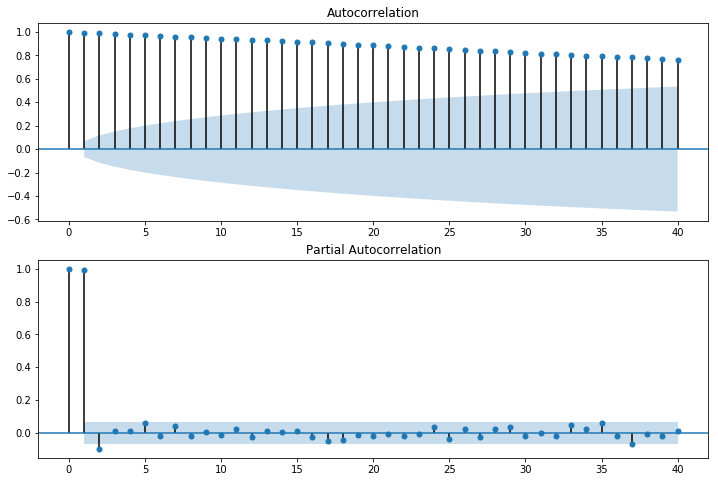

In [39]:
# Exploratiopn of the serial correlation
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mcsdaten.Price, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mcsdaten.Price, lags=40, ax=ax2)
plt.show()

# Application of the Auto Regressive Moving Average (ARMA) Modell

In [40]:
# Application of the Auto Regressive Moving Average (ARMA) Modell
#..with the parameters Ar(p) and Ma(q)
from statsmodels.tsa.stattools import ARMA
def best_AR_MA_checker(df,lower,upper):
    from statsmodels.tsa.stattools import ARMA
    from statsmodels.tsa.stattools import adfuller
    arg=np.arange(lower,upper)
    arg1=np.arange(lower,upper)
    best_param_i=0
    best_param_j=0
    temp=12000000
    rs=99
    for i in arg:
        for j in arg1:
            model=ARMA(df, order=(i,0,j))
            result=model.fit(disp=0)
            resid=adfuller(result.resid)
            if (result.aic<temp and  adfuller(result.resid)[1]<0.05):
                temp=result.aic
                best_param_i=i
                best_param_j=j
                rs=resid[1]
                
                
            print ("AR: %d, MA: %d, AIC: %d; resid stationarity check: %d"%(i,j,result.aic,resid[1]))
            
    print("the following function prints AIC criteria and finds the paramters for minimum AIC criteria")        
    print("best AR: %d, best MA: %d, best AIC: %d;  resid stationarity check:%d"%(best_param_i, best_param_j, temp, rs))     
best_AR_MA_checker(mcsdaten.Price,0,3) #For each parameter we try from 0 to 2

AR: 0, MA: 0, AIC: 12594; resid stationarity check: 0
AR: 0, MA: 1, AIC: 12594; resid stationarity check: 0
AR: 0, MA: 2, AIC: 12594; resid stationarity check: 0
AR: 1, MA: 0, AIC: 7756; resid stationarity check: 0
AR: 1, MA: 1, AIC: 7756; resid stationarity check: 0
AR: 1, MA: 2, AIC: 7756; resid stationarity check: 0
AR: 2, MA: 0, AIC: 7718; resid stationarity check: 0
AR: 2, MA: 1, AIC: 7718; resid stationarity check: 0
AR: 2, MA: 2, AIC: 7718; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 2, best MA: 0, best AIC: 7718;  resid stationarity check:0


In [41]:
# arma(1,0) is being calculated now
from statsmodels.tsa.stattools import ARMA
model=ARMA(mcsdaten.Price, order=(1,0))
res=model.fit(disp=0)
print (res.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  839
Model:                     ARMA(1, 0)   Log Likelihood               -3875.371
Method:                       css-mle   S.D. of innovations             24.439
Date:                Fri, 03 Jan 2020   AIC                           7756.742
Time:                        23:10:16   BIC                           7770.938
Sample:                             0   HQIC                          7762.183
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         672.0576    579.238      1.160      0.246    -463.228    1807.343
ar.L1.Price     0.9993      0.001   1169.489      0.000       0.998       1.001
                                    Roots       